# MA6202: Laboratorio de Ciencia de Datos

**Profesor: Nicolás Caro**

**13/04/2020 - C6 S3**

## Librerías Básicas 

Una vez comprendiendo el funcionamiento de clases, funciones y las propiedades básicas de manejo de tipos de datos y módulos, se  pasan a estudiar ciertas funcionalidades extras del *stack* nativo de Python. Aquí se incluye el manejo de archivos, funciones e iterables. 

Finalmente, se repasan ciertos métodos del *stack* científico que escapan a las librerías proporcionadas nativamente por Python pero que forman parte del estándar de computación en ciencia de datos.

*Nota*: Python se considera un lenguaje con *baterías incluidas* esta referencia se hace por la gran cantidad de librerías nativas a las que se tiene acceso únicamente con instalar el interprete.

### Manejo de archivos

Un archivo consiste en un conjunto de datos (o información si se prefiere) relacionados de manera lógica e interpretable mediante algún programa. En sus funcionalidades básicas, Python permite el manejo de archivos mediante la función ```open()```. La sintaxis de lectura de archivos es:

```python
obj = open('ruta/al/archivo', 'r')
```
Donde el parámetro 'r' indica que el archivo a operar será abierto en modo lectura. 

**Ejemplo**

El módulo ```wiki_getter``` posee la función ```wiki_intro_getter()```, esta recibe una pagina de wikipedia y entrega su introducción.

In [ ]:
from wiki_getter import wiki_intro_getter

'''
esta funcion carga por defecto la pagina de wikipedia que define un 
archivo de computador
'''

intro_file = wiki_intro_getter()

Por otra parte, tal módulo posee la función ```to_txt()``` que permite guardar un string de Python en un archivo de texto en la carpeta actual de trabajo. Se guarda el texto ```intro_file```

In [ ]:
from wiki_getter import to_txt
to_txt(intro_file, 'intro_file')

Se utiliza la función ```open()``` para leer el contenido del archivo recién generado.

In [ ]:
file = open('intro_file.txt','r')

# Se lee el archivo linea por linea, el objeto file es un iterable!
for line in file: 
    # entrega un string removiendo el ultimo espacio en blanco
    print(line.rstrip())
    
# Posteriormente se debe cerrar el objeto file
file.close()

La función ```open()``` se puede utilizar para escribir archivos. Para ello se le entrega el argumento 'w'. 

**Ejemplo**

Se toma el text ```intro_file.txt``` del ejemplo anterior y se utiliza para agregar un titulo al texto. Para esto es necesario abrir un nuevo archivo ```'intro_file_0.txt'``` en modo escritura.

In [ ]:
# Se abre el archivo incial
file = open('intro_file.txt','r')

# Se abre un archivo proxy
file_to_write = open('intro_file_0.txt','w')

# Se define el titulo a agregar
title = 'Archivos: Introducción'

# Se agrega el titulo al texto del archivo inicial
text_to_write = title + '\n' + file.readlines()[0]

# Se escribe el nuevo texto en el archivo proxy
file_to_write.write(text_to_write)

# Se cierra la conexion a los archivos
file.close()
file_to_write.close()

Se comprueba el resultado

In [ ]:
# Se imprime en pantalla cada linea del archivo
for line in open('intro_file_0.txt','r'):
    print(line.rstrip())

Para leer y escribir de manera simultanea en un mismo archivo existen las opciones:

* ```'r+'```: abre un archivo existente con permisos de escritura.
* ```'w+'```: crea un archivo vacío y permite leerlo.

En los objetos obtenidos a partir de ```open()```, existe la noción de *posición*. Se accede a esta por medio de los métodos ```.seek()``` and ```.tell()```. 

**Ejemplo**

Para comprender la noción de posición, es útil pensar en ```.tell()``` como un método que entrega la posición del *cursor* en un editor de archivos de texto. Por su parte ```.seek(n)``` sitúa tal cursor en la posición ```n```. 

En el siguiente código, se abre el archivo ```'intro_file_0.txt'```. Se establece la posición ```1``` por medio de  ```.seek(1)```, luego se imprime en pantalla el caracter asociado a la posición 1.

In [ ]:
file_0 = open('intro_file_0.txt','r')
file_0.read(1)

**Obs**: El método ```.read(n)``` imprime en pantalla hasta el caracter n partiendo **desde** la posición actual dada por ```.tell()```.

Posteriormente, se establece la posición ```10``` y se confirma por medio de ```.tell()```

In [ ]:
file_0.seek(10)
pos_0 = file_0.tell()
pos_0

Lo anterior sitúa el *cursor* en la posición ```10```. Por lo tanto, si se ejecuta el método ```.read(12)```. ¿Qué debería imprimirse en pantalla?

In [ ]:
file_0.read(12)

Considerando ```.read(12)``` avanza 12 posiciones luego de la inicial, se espera que la posición actual sea  ```pos_0 + 12 + 1 = 23```:

In [ ]:
print(file_0.tell())
file_0.close()

Que comprueba lo anterior.

**Ejercicio**

El objetivo de este ejercicio es leer y escribir un archivo simultáneamente, haciendo uso de ```.seek()```.

1. Cargue el archivo ```ejercicio_1``` en la carpeta de trabajo actual, en modo de lectura y escritura.
2. Añada el titulo dado por la variable ```title```, en la primera linea. Para ello:
    1. Genere una variable auxiliar que permita añadir el texto ```title``` al comienzo del texto asociado al archivo ```ejercicio_1```.
    2. Vaya a la posición adecuada del archivo por medio de ```.seek()``` y escriba el valor de la variable auxiliar. ¿Qué ocurre si no utiliza ```.seek()```?
    3. Cierre la conexión al archivo ```ejercicio_1```.
3. El parámetro 'a+' permite abrir un archivo para agregar contenido al final de este (append) por medio del método ```.write()```. Abra una conexión al archivo ```ejercicio_1``` recientemente modificado. Añada al final de este archivo, el contenido de la variable ```obs```. ¿En qué se diferencia con abrir el archivo en modo escritura e insertar texto utilizando ```.seek()```?

In [ ]:
title = "PROYECTO DE TREN INSTANTANEO"

obs = "\n Observacion: este tipo de tren (directo) \n "
obs += "sirve solo para viajes de ida"  

### Context managers

Cuando un programa de Python accede a un recurso o archivo de la máquina, procede comunicándose con el sistema operativo correspondiente. Este, proporciona un puntero (o conexión) al recurso, el acceso a tales recursos es limitado y por tanto es necesario cerrar tales conexiones cuando ya no son necesarias. Una manera de hacerlo es por medio de ```file.close()``` cuando file es un objeto obtenido por medio ```open()```. En el primer ejemplo se estudió el siguiente código:

```python
file = open('intro_file.txt','r')

# ----- Ciclo ------
for line in file: 
    print(line.rstrip())
    
# Se cierra la conexion
file.close()
```
Si el ciclo ```for``` posterior a la apertura de conexión falla por algún motivo, se tiene que la orden ```file.close()``` no llega a ejecutarse, y por tanto la conexión al recurso ```'intro_file.txt'``` no se cierra. Esto grafica que la dinámica ```open()``` - ```.close()``` no es lo suficientemente robusta para manejar conexiones a recursos de la máquina. 

Con las herramientas vistas hasta este punto, se puede reformular el código anterior utilizando bloques ```try```-```except``` en conjunción con ```finally```, esto da lugar al código:

```python
try:
    file = open('intro_file.txt','r')

    # ----- Ciclo ------
    for line in file: 
        print(line.rstrip())
except:
    print('El ciclo falla')
    
finally:    
    # Se cierra la conexion
    file.close()

```

El código anterior se puede resumir como en un bloque de ejecución (try), uno de manejo de errores opcional (except) y uno de limpieza (finally). Python automatiza este proceso por medio de **context managers**, siendo estos, la manera pythonica de trabajar con acceso a recursos. 

**Ejemplo**

Con el fin de comprender la lógica de un context manager, se implementa una clase ```FileReader``` que automatiza el acceso a lectura de archivos. En primer lugar se crea un constructor para el nombre del archivo:

```python
class FileReader:
    def __init__(self,name):
        self.name = name
```

En segunda instancia se sobrecarga el método ```.__enter__()```. Este método modela el acceso a un recurso que posteriormente debe cerrarse por medio del método ```.__exit__()```. Los objetos obtenidos por medio de ```open()``` poseen definiciones para ambos operadores. Se pasa sobrecargar el operador de conexión ```.__enter__()```

```python
class FileReader:
    # Constructor
    def __init__(self,name):
        self.name = name
    
    # Conexión de entrada
    def __enter__(self):
        self.file = open(self.name, 'r')
        return self.file
```

Hasta ahora se ha codificado el comportamiento de un bloque ```try``` donde se accede a un recurso. Para cerrar el acceso, se sigue la lógica de un bloque ```finally```, lo que se lleva a cabo sobrecargando el método ```.__exit__()```:

```python
class FileReader:
    '''Equivalente a un bloque try'''
    
    # Constructor
    def __init__(self,name):
        self.name = name
    
    # Conexión de entrada
    def __enter__(self):
        self.file = open(self.name, 'r')
        return self.file
    
    '''Equivalente a un bloque finally (sin manejo de excepciones)'''
    # Proceso de cerraro o cleanup
    def __exit__(self):
        self.file.close()
```

Un bloque ```with``` es capaz de ejecutar de manera nativa las ordenes 
```__enter__``` y ```__exit__```, automatizando el proceso ```try``` - ```except``` - ```finally``` antes deducido. Solo es necesario proporcionarle el objeto de Python enlazado a la conexión que se desea abrir, en el ejemplo trabajado, este objeto es la variable ```file```. Por tanto, si se desea ejecutar:

```python
try:
    file = open('intro_file.txt','r')

    # ----- Ciclo ------
    for line in file: 
        print(line.rstrip())
        
except:
    print('El ciclo falla')
    
finally:    
    # Se cierra la conexion
    file.close()


```

En la notación dada por la clase ```FileReader```, esto es equivalente a ```file = FileReader('intro_file.txt')```. Queda solamente que el bloque ```with``` pueda ejecutar las ordenes de entrada y salida de conexión sobre el objeto ```file```, para ello, se usa la notación:

```python
with FileReader('intro_file.txt') as file:
    ...
```
Aqui, se genera un nuevo scope local, donde la variable ```file``` entra con el valor ```file = FileReader('intro_file.txt')```. Luego, se ejecuta el constructor de la clase ```FileReader``` y el método ```.__enter__()```. finalmente, cuando todas las ordenes dentro del bloque se ejecutan, se llama el método de limpieza ```.__exit__()```.

In [ ]:
# Clase tipo context manager planificada
class FileReader:
    '''Equivalente al bloque try
    -----------------------------------
    ''' 
    # Constructor
    def __init__(self,name):
        self.name = name
    
    # Conexión de entrada
    def __enter__(self):
        self.file = open(self.name, 'r')
        return self.file
    
    '''Equivalante a un bloque finally (sin manejo de excepciones)
    ------------------------------------
    '''
    # Proceso de cerraro o cleanup
    def __exit__(self,*exc):
        self.file.close()

Se lee el archivo ```intro_file.txt``` para probar los resultados

In [ ]:
with FileReader('intro_file.txt') as file:
    for line in file: 
        print(line.rstrip())

Se agregan prints de pantalla para corroborar el proceso de ejecución ```__enter__``` - ```__exit__```

In [ ]:
class FileReader:
    '''Equivalente al bloque try
    -----------------------------------
    ''' 
    # Constructor
    def __init__(self,name):
        print('[Construyendo objeto ... ]\n')
        self.name = name
    
    # Conexión de entrada
    def __enter__(self):
        print('[Estableciendo conexion al archivo ...] \n')
        self.file = open(self.name, 'r')
        return self.file
    
    '''Equivalante a un bloque finally (sin manejo de excepciones)
    ------------------------------------
    '''
    # Proceso de cerraro o cleanup
    def __exit__(self,*exc):
        print('[Limpiando conexion ...] \n')
        self.file.close()

Se corrobora con el archivo ```ejercicio_1```

In [ ]:
with FileReader('ejercicio_1') as file:
    
    print('[Procesando archivo ... ]')
    for line in file: 
        print(line.rstrip())

Lo que comprueba el esquema presentado. 

**Ejercicios**

1. En el módulo ```wiki_getter```, dentro de la función ```to_txt()```, se encuentra el siguiente código.

```python 
# Define la funcion que guarda el archivo
def write_file(name, text):
    print('Guardando archivo ...')
    file = open(name + '.txt', 'w')
    file.write(text)
    file.close()
    print('Archivo guardado con el nombre: ', name +'.txt')
```
Este cumple con la misión de crear un archivo nuevo, con el nombre ```name```, en cual almacena el contenido ```text```. Escriba un objeto context manager que permita ejecutar el cuerpo de la función ```write_file``` utilizando un bloque ```with```. El nuevo objeto debe tener el nombre ```WriteConn``` y se debe poder acceder desde el módulo ```wiki_getter```.

2. En la construcción utilizada para introducir el concepto de context manager, aparece la noción de "manejo de excepciones opcional"(en el bloque ```except```). Al observar la estructura del método ```.__exit__()```, se observa el argumento opcional ```*exc```. La idea de tal argumento es justamente otorgar la funcionalidad de manejo de excepciones a un context manager. La finalidad de este ejercicio es que usted cree un context manager capaz de manejar errores. Para esto:
    1. Defina la clase ```RetryRun```, esta clase tiene el atributo privado y estático ```__error = None```, un atributo estático y protegido ```_attemps = 1```. Tiene además, los atributos públicos```retries``` y ```func```. *hint*: los últimos atributos no son estáticos.
    
    2. Defina un getter para error por medio de una propiedad.
    
    3. Defina el método ```func_retry(self,*args,**kwargs)```. Al comienzo de este método inicialice el atributo estático ```__error = []```. Luego, ejecute ```retries``` veces la orden ```self.func(*args, **kwargs)```. Para cada una de esas veces, si la orden arroja una excepción, entonces debe apendarla a la lista ```__error``` y aumentar el atributo ```_attemps``` en uno, además debe imprimir ```'Hubo errores, re-intentando ...'```. Por último, si la lista ```__error``` posee elementos, se debe levantar la última excepción de tal lista.
    
    4. Implemente un método ```__enter__``` que retorne al objeto context manager.
    
    5. Implemente un método ```__exit___(self, exc_type, exec_val, trace)``` que imprima en pantalla ```'No se tuvo acceso al recurso'``` en caso de que ```exc_type``` sea no vacío. En caso contrario debe ejecutar ```print('Ejecución exitosa en ' + str(self._attemps) + ' intento/s')```.
    6. Pruebe el context manager anterior en un bloque ```with``` para la función ```func = lambda x, y: x / y``` probando valores de ```x,y``` de manera tal que se aprecie el funcionamiento de todos los métodos implementados. *Hint*: Inicialice el bloque with con el comando ```with RetryRun(numero,func) as r_obj:```, luego, dentro del bloque ```with``` acceda al método ```r_obj.func_retry(x,y)```. Sólo esa orden debe estar dentro del bloque.

### Almacenamiento de Objetos con Pickle

Una de las prácticas en el núcleo de la ciencia de datos, es la obtención de modelos. Por obtención de modelos, se entiende al acto de alcanzar estructuras optimas en base a datos para ciertas métricas de desempeño. Estas estructuras, vienen dadas por un conjunto de parámetros e hiperparámetros, que explican de manera teórica a un fenómeno. Por lo general estos valores se almacenan en estructuras simples como secuencias contenedoras o más complejas como objetos representando máquinas de kernel o redes neuronales. Cuando las estructuras son complejas, es necesario un método elaborado para guardarlas y restaurarlas. La librería ```pickle``` permite guardar en memoria estructuras complejas de Python para después recuperarlas en memoria de manera sencilla. 

Esta librería (o package) se importa por medio de

```python
import pickle
```

El método que permite guardar estructuras en memora es ```.dump()```, este recibe como argumentos un objeto ```obj```y la ruta donde se guardará tal objeto ```file```. La librería ```pickle``` opera de manera nativa con la función ```open()``` y por tanto, es una práctica común utilizarla con bloques ```with```. 

**Ejemplo**

Supogamos que queremos guardar un objeto de la clase ```FileReader``` para usarlo posteriormente. Para ello, se abre un archivo 'data.pkl' en el directorio de trabajo actual, este se debe abrir en modo 'bw', esto significa 'modo escritura en bytes'. El código nos permite guardar la clase es:

In [ ]:
import pickle 
file = FileReader('ejercicio_1')

with open('data.pkl','bw') as handler:
    pickle.dump(file, handler)

Borramos el objeto ```file```.

In [ ]:
del file

Para cargar el objeto nuevamente, hacemos uso de ```open()``` en modo `'rb'` o 'modo de lectura en binario' y usamos el método ```pickle.load()``` sobre el recurso levantado con ```open()```. El código es:

In [ ]:
with open('data.pkl','br') as data:
    file = pickle.load(data)

Ejecutamos el contenido de file.

In [ ]:
texto = file.__enter__()
print('[Procesando archivo ... ]')
for line in texto: 
    print(line.rstrip())
file.__exit__()

Observe que el código anterior es una ejecución secuencial de un bloque ```with```. Por otra parte, si borramos la clase ```FileReader``` de la memoria e intentamos cargar el objeto ocurre los siguiente

In [ ]:
try:
    del FileReader
except:
    print('Clase FileReader ausente en la memoria')

In [ ]:
with open('data.pkl','br') as data:
    try:
        file = pickle.load(data)
    except Exception as ex:
        print('No se puede reconstituir el objeto!')

Esto ocurre, pues si bien, se tiene una representación del objeto deseado, no están cargadas las librerías o clases suficientes para reconstituirlo. Por eso siempre hay que tener en cuenta las dependencias y definiciones en memoria antes de guardar un objeto.

## Breve Tour por las Librerías Estándar

Se analizan librerías estándar en la programación con Python. Para cada una de estás, se estudian métodos de interés y se proporciona la documentación como material complementario.

Se debe tener en cuenta que todas estas librerías vienen incluidas al instalar Python.

### functools

`functools` es un módulo para funciones de orden superior, en términos prácticos, objectos que tengan la propiedad `callable`. Es decir que puede ser llamado de la forma ```objeto()```. Más documentación disponible [aqui](https://docs.python.org/3.7/library/functools.html).

Está librería se importa de la manera usual.

In [ ]:
import functools

#### 1.1 functools.reduce

Como primer ejemplo usaremos `functools.reduce`, esta función recibe como argumentos una función de 2 argumentos y un iterable, y aplica esta función de forma acumulativa a los elementos del iterable de izquierda a derecha de forma de reducir la secuencia a un solo valor.

El primer argumento de los 2 de la función a pasar es el valor acumulado y el segundo es el valor siguiente de la secuencia.

Por ejemplo

```python
fun = lambda x, y: x + y
functools.reduce(fun, [1, 2, ,3, 4, 5])
```

Al ejecutar esta línea se calcula:
1. fun(1, 2)
2. fun(fun(1, 2), 3) 
3. fun(fun(fun(1, 2), 3), 4)
4. fun(fun(fun(fun(1, 2), 3), 4), 5)

Lo que en total entrega,

$$\left(\left(\left(\left(1+2\right)+3\right)+4\right)+5 \right) = 15$$


`functools.reduce` también tiene un tercer (opcional) argumento, `initializer`, si este es entregado se utiliza como primer elemento en el calculo acumulativo, por lo que si en el caso anterior se tuviera

`functools.reduce(fun, [1, 2, ,3, 4, 5], 8)`

el resultado sería,

$$8 + ((((1+2)+3)+4)+5) = 23$$

**Ejercicios**

1. Implemente ```sum([1, 2, 3, 4, 5])``` utilizando ```functools.reduce()``` y una función lambda.

2. Generalice lo anterior usando ```range()```.

3. El módulo ```operator``` incluye un conjunto de funciones relacionadas a operadores intrínsecos de Python, por ejemplo ```operator.add(x, y)``` es equivalente a ```x+y```. Importe el módulo  ```operator```, utilice ```operator.add``` sobre una lista de strings por medio de ```functools.reduce()```. Agregue un string como argumento *initializer*, deduzca su funcionamiento.

#### Decorador @functools.singledispatch

Este decorador sirve para convertir una función en una función polimórfica.

Una función polimórfica esta compuesta de múltiples funciones que realizan la misma operación dependiendo del tipo de datos, un ejemplo de esto es el operador suma (`+` o `operator.add`) que dependiendo si es un ```int```, ```float```, ```string```, etc realizar operaciones diferentes.

```python
1 + 3
>>> 4

'AA' + 'BB'
>>> 'AABB'
```

Es importante notar que este decorador creara un registro (denotado como *dispatch*) hacia las diferentes funciones dependiendo del tipo del primero argumento que se reciba, cosa que se debe tener en cuenta al crear las funciones.

Una creada esta función, para agregar las demás funciones que serán llamadas dependiendo del tipo se utiliza el decorador `@function_name.register(type)`

**Ejemplo**

Primero creemos una función que tome un primer argumento cualquiera e imprima este argumento.

In [ ]:
@functools.singledispatch
def fun(arg, verbose=False):
    if verbose:
        print("Let me just say,", end=" ")
    print(arg)

Como aún no se define ninguna de las funciones que llamará dependiendo del tipo de variable, el output es el mismo independiente del tipo de variable.

In [ ]:
fun('bye!', False)
fun('bye!', True)

Ahora se crean funciones que serán llamadas cuando el argumento es de tipo `int` y cuando es de tipo `list`.
Ambas funciones tendrán como nombre `_` porque este nombre no será usado para llamar a la función.

In [ ]:
@fun.register(int)
def _(arg, verbose=False):
    if verbose:
        print("Strength in numbers, eh?", end=" ")
    print(arg)

@fun.register(list)
def _(arg, verbose=False):
    if verbose:
        print("Enumerate this:")
    for i, elem in enumerate(arg):
        print(i, elem)

Como no se tiene una función definida para valores del tipo `string` evalúa la función original

In [ ]:
fun('bye!', True)

Ahora si se usa un tipo `int`, se puede ver que utiliza la función registrada

In [ ]:
fun(3, True)

Lo mismo ocurre para listas

In [ ]:
fun([1,2,3], True)

In [ ]:
fun(None, True)

**Ejercicios**

El método `register()` retorna una función sin decorar, esto permite acumular decoradores. 

1. Defina el comportamiento de `fun` para listas y tuplas. Utilice una función sin nombre. Para esto.
    1. Utilice el decorador `@fun.register(list)`.
    2. Bajo el decorador anterior, declare el decorador `@fun.register(tuple)`.
    3. utilizando la notación `_` defina una función sin nombre que reciba `arg` como argumento y ```verbose = False``` como argumento predeterminado. Si `verbose` es verdadero, debe imprimir ```"Enumerate this:"```. Finalmente, debe imprimir cada elemento de la lista o tupla entregada, con una enumeración para cada elemento.
  
2. Registre un comportamiento para `fun` cuando opera en números `float`, si `verbose = True` se debe imprimir `"Half of your number:"`. Finalmente, se imprime la mitad del `float`. 

Para acceder a registradas funciones creadas a una función dispatch, se puede utilizar `functionname.dispatch(type)`, para el caso `float`, se tendría:

```python
fun.dispatch(float)
```

A la cual se puede acceder por medio de 
```python
# Ejemplo de acceso
fun.dispatch(float)(2.45, True)
```

**Ejercicio**

1. ¿Qué debe retornar `fun.dispatch(data_type)` si `data_type` no está registrado para `fun`?

Finalmente, se puede acceder a todos los registros de una función por medio de ```.registry.keys()```:

In [ ]:
fun.registry.keys()

#### functools.partial

Este método sirve para hacer evaluaciones parciales de funciones, es decir, dada una función con un numero $N$ de argumentos, al aplicar el método `partial` entregándole la función y un número $M < N$ argumentos, nos retornará una una función que esta compuesta de la función original pero con los $M$ argumentos fijos al valor pasado, se puede ahora trabajar únicamente con los $N-M$ argumentos restantes.

Esto permite "congelar" algunos argumentos de una función dada y no tener que estar pasando de forma reiterada los mismos argumentos.

**Ejemplo**

Si se tiene una función $f(a, b, c)$, es posible experimentar fijando $b$ y $c$ en un valor dado, mientras varía el valor de $a$.

In [ ]:
def fun(a, b, c):
    print('First {}, then {} and finally {}'.format(a, b, c))
    
fun('1', '2', '3')

Se aplica evaluación parcial

In [ ]:
fun_partial = functools.partial(fun, 'we are born', c='we die')
fun_partial('we live')

**Ejercicio**

1. Defina una función `lambda` para la multiplicación de 5 números. Utilice `functools.partial()` para fijar 3 de los factores.

2. Estudie los atributos `func`, `args` y `keywords` de la función parcial antes definida.

#### functools.partialmethod

Este método se comporta de forma similar a `partial` pero esta diseñado para crear nuevos métodos en clases.

La función con la cual se utiliza puede ser un descriptor o un *callable*.

**Ejemplo**

Como ejemplo se crea una clase `Cell` la cual tendrá inicialmente un método para ser llamado, `set_state` el cual permite modificar el atributo `_alive` a `True` o `False`.

Luego, se utiliza `partialmethod` para crear otros 2 métodos de clase `set_alive` y `set_dead` donde cada uno sera un llamado a `set_alive` con el argumento fijo a True o False respectivamente.

In [ ]:
class Cell(object):
    def __init__(self):
        # Al inicializar el objeto parte vivo
        self._alive = True
        
    @property
    def alive(self):
        return self._alive
    
    def set_state(self, state):
        self._alive = bool(state)
    
    # se definen resucite y kill utilizando partialmethod
    resucite = functools.partialmethod(set_state, True)
    kill = functools.partialmethod(set_state, False)

In [ ]:
c = Cell()
c.alive

In [ ]:
c.kill()
c.alive

In [ ]:
c.resucite()
c.alive

### Itertools

Permite crear iteradores para manejar de forma eficiente y simple ciclos. Una ventaja de usar iteradores es que no es necesario que se guarden todos los valores en memoria, sino que se generan al llamar el método `next()` esto permite que en un ciclo `for` de gran tamaño no se tenga que gastar en memoria para guardar los indices que se recorrerán.

**Obs**:Cuando no queden más elementos la excepción `StopIteration` es levantada.

La documentación completa la pueden encontrar [aqui](https://docs.python.org/3.7/library/itertools.html)

Se importa utilizando la convención:

In [ ]:
import itertools as it

**Ejemplo**

`itertools.count()`,  este recibe 2 argumentos `start`, `step` y genera números de la forma 

$$
start + n * step, \quad n=0, 1, 2, \ldots
$$

In [ ]:
counter = it.count(3)

se puede ejecutar el método `next()` sobre `counter`:

In [ ]:
next(counter)

**Ejercicios**

1. Defina un *iterable* que comience en 10 y avance en pasos de a 2. ¿Qué ocurre si se ejecuta un `for` sobre tal objeto?

2. `itertools.repeat(num,n)` permite repetir el mismo `num` valor `n` veces. ¿Qué ocurre si se llama `itertools.repeat(num)` y se ejecuta un `for` sobre el *iterable* resultante ?

3. Utilice `map`, `pow` e`it.repeat` para definir una lista de las diez primeras potencias de 2.

`itertools.chain` permite encadenar iterables, este recibe un número arbitrario de iterables, y va tomando elementos del primer iterable hasta que se acaba, luego pasa con el segundo y así sucesivamente.

**Ejemplo**

Se encadenan 2 iterables, `a` y `b`:

In [ ]:
a = range(10)
b = it.repeat(3, 5)

chained = it.chain(a, b, a)

# Se itera sobre la cadena
for i in chained:
    print(i)

`itertools.cycle` genera un iterador que entrega elementos de un iterable hasta que se acaba, para luego empezar a repetir nuevamente la secuencia indefinidamente

**Ejemplo / Ejercicio**

¿Qué ocurre se se ejecuta?
```python

for i in it.cycle('ABCDFG'):
    print(i)

```

#### Itertools para control de flujo

A continuación se estudian 4 funciones que permiten controlar el flujo mediante condiciones.

*  `itertools.dropwhile` recibe un iterable y retorna un iterador que elimina elementos del iterable, siempre que se cumpla cierta condición, luego que se rompe tal condición, entrega todos los valores.

*  `itertools.takewhile` inverso a `dropwhile`, entrega valores hasta que se quiebra la condición.

*  `itertools.filterfalse` genera un iterator que retorna valores siempre que la condición sea falsa.

**Ejemplos**

Se estudian los métodos de manera simultanea

In [ ]:
# condición de no ser divisible por 7
condition = lambda x: not(x%7 == 0)
    
for i in it.filterfalse(condition, range(8, 30)):
    print('{} es divisible por 7'.format(i))

print()
    
for i in it.dropwhile(condition, range(8, 30)):
    print('Valor:{}, luego del primer valor divisible por 7 entrego todo'.format(i))

print()
for i in it.takewhile(condition, range(8, 30)):
    print('Valor:{}, aun no encuentro un número divisible por 7'.format(i))

#### Itertools para combinatoria

Itertools también tiene herramientas para generar combinatorias de elementos

* `itertools.combinations`: Retorna subsecuencias de largo $r$ de elementos de un iterable (No importa el orden)

Dado un iterable de largo $L$, el número de combinaciones esta dado por

$$ \binom{L}{r}$$

* `itertools.combinations_with_replacement`: Retorna subsecuencias de largo $r$ de elementos de un iterable, permitiendo que se repitan elementos.

El numero total de combinaciones con repetición esta dado por

$$ L^r$$

* `itertools.permutations`: Retorna sucesivas permutaciones de largo $r$ a partir de un iterable (importa el orden)

El numero total de permutaciones esta dado por

$$ \binom{L}{r} r!$$

**Ejemplo**

Se prueban las combinaciones de 3 elementos sobre 'A','B' 'C' y 'D'.

In [ ]:
combi = it.combinations('ABCD', 3)
for i in combi:
    print(i)

Se pasa a estudiar combinaciones con reemplazo

In [ ]:
combi_wr = it.combinations_with_replacement('ABCD', 3)
for i in combi_wr:
    print(i)

Finalmente se estudian permutaciones:

In [ ]:
permu = it.permutations('ABCD', 3)
for i in permu:
    print(i)

## NumPy y SciPy: Librerías Científicas 

Numpy y SciPy son módulos de código abierto para Python que proveen rutinas matemáticas precompiladas y de alto rendimiento. Ambos paquetes son estándar a la hora de trabajar con operaciones numéricas, siendo NumPy la base para el trabajo con vectores y matrices, mientras que SciPy extiende dichas rutinas al incorporar algoritmos de análisis numérico, optimización, transformadas de Fourier entre otras.

### Numpy

NumPy (Numerical Python) es el módulo fundamental para la computación científica en Python, según [Numpy](http://www.numpy.org/). Este módulo contiene operaciones de alto rendimiento en álgebra lineal, transformada de Fourier y cálculo de valores aleatorios. Permite el manejo eficiente de arreglos multi-dimensionales y se integra con C/C++ y Fortran.

Su uso se ha vuelto un estándar en computación científica, en particular en ciencia de datos y machine learning, su uso es similar a otras herramientas matemáticas como MATLAB. Se puede encontrar documentación útil para este curso [aqui](https://numpy.org/devdocs/user/quickstart.html).

Se importa usando la sintaxis:

In [1]:
# alias comun es np
import numpy as np

#### Creación de arrays

Numpy permite entre otras cosas:

* Crear _arrays_ llenos de ceros
* Crear _arrays_ de 1
* Convertir listas de python a ndarrays

In [2]:
# Arreglo de "ceros", de largo 10
a = np.zeros(10)

# Arreglo de "unos", de forma [5,5]
b = np.ones([5,5])

print("Arreglo de tamaño 10:\n",a,"\n")
print("Arreglo de tamaño [5,5]:\n",b,"\n")

Arreglo de tamaño 10:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 

Arreglo de tamaño [5,5]:
 [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]] 



Numpy soporta la conversión nativa de listas a arreglos

In [3]:
# Convertir de lista de python a numpy array
c = [1, 10, 100, 1000]
print('Antes de convertir', type(c)) # muestra el tipo de dato
c = np.array(c)
print('Despues de convertir', type(c)) # muestra el tipo de dato

Antes de convertir <class 'list'>
Despues de convertir <class 'numpy.ndarray'>


Posee rutinas de generación de arreglos con valores consecutivos ```.arange()``` y discretización de intervalos ```.linspace()```

In [4]:
# Crear arreglos de valores consecutivos o en un intervalo
a = np.arange(10)
print(a)

b = np.linspace(1, 10, 4)
print(b)

[0 1 2 3 4 5 6 7 8 9]
[ 1.  4.  7. 10.]


Un objeto primordial de esta librería es son los de tipo `ndarray`. Este tipo de dato hace referencia a vectores a arreglos multidimensionales, dando origen a matrices o vectores simples.

Un objeto tipo `ndarray` posee un largo que sobrecarga al operador `len()` y representa la dimensión de la primera coordenada del arreglo. Por otra parte, los arreglos `ndarray` poseen forma o `shape`, este atributo muestra las dimensiones en cada eje del arreglo.

In [5]:
# Declaración de un array 3x4
a = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])

# array de 10x2
b = np.ones((10, 2))

print('Len: {},  Shape:{}'.format(len(a), a.shape))
print('Len: {},  Shape:{}'.format(len(b), b.shape))

''' OBS:
El metodo .format(*args) del tipo de dato string, a groso modo,
reconoce los caracteres {} dentro del string. Por defecto asigna args[0] 
al primer par {} a la izquierda, luego arg[1] al segundo par {} 
a la izquierda, asi hasta llegar a arg[-1]. Dentro de {} se puede 
dar formato al tipo de dato que se desea insertar, por ejemplo {:b}, 
muestra el contenido de arg[n] en formato binario.
''';

Len: 3,  Shape:(3, 4)
Len: 10,  Shape:(10, 2)


Los arrays operan como vectores, es por esto, que su manejo se haga natural, de esta forma sumar 2 `ndarrays` se puede llevar a cabo por medio de:

In [6]:
# array de 3x5 lleno de 10's
x = np.full((3, 5), 10)

y = np.random.random((3, 5))

print(x+y)

[[10.91384709 10.5482828  10.23174129 10.31165211 10.57285698]
 [10.08197867 10.88357177 10.84151398 10.35046463 10.73463316]
 [10.26597833 10.02296077 10.19289603 10.21156477 10.21094436]]


En este caso, `full((3, 5), 10)` genera una matriz de 3x5 llena (_full_) de 10. Por otra parte, Numpy posee un submódulo dedicado a rutinas con número pseudo aleatorios. En este caso, se accede a tal submódulo por medio de `np.random`, luego se accede al método `.random()` (mismo nombre que el módulo) que recibe una tupla $(n,m)$ como argumento y genera una matriz de $n \times m$ donde cada elemento es un número $ u_{ij} \sim \text{unif}([0,1])$. Se puede ver que la suma entre las dos matrices generadas, se comporta como es de esperar. 

Por otro lado, los arreglos NumPy permiten traslaciones y amplificaciones por medio de:

In [7]:
# Arreglo con la los numeros 0,1,...,9
a = np.arange(10)
a = a + 4 # Traslacion
a

array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [8]:
# Discretizacion del intervalo [0,10] en una particion de 4 puntos
b = np.linspace(1, 10, 4)
b = b * 2 # Amplificacion
b

array([ 2.,  8., 14., 20.])

La multiplicación de arreglos elemento por elemento se lleva a cabo con el operador `*`

In [9]:
# Arreglo de 1's con la forma del arreglo b
c = np.ones_like(b) * 5 

#Aplicar multiplicacion elemento a elemento entre los arreglos
mult = b * c

print("Arreglo b:\n",b,"\n")
print("Arreglo c:\n",c,"\n")
print("Resultado:\n",mult,"\n")

Arreglo b:
 [ 2.  8. 14. 20.] 

Arreglo c:
 [5. 5. 5. 5.] 

Resultado:
 [ 10.  40.  70. 100.] 



Por otra parte, se soporta la **multiplicación matricial**, para ello, existen los métodos:

* `np.matmul(a, b)`
* `np.dot(a, b)`
* `a.dot(b)`
* `a @ b`

In [10]:
# Multiplicación matricial
# Declaración de un arreglo 3x4
A = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])

# Declaración arreglo 4x2
B = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])

# Multiplicacion a por b
C = np.matmul(A, B)  # Multiplicación matricial

print('Matriz A: \n', A, '\n')
print('Matriz B: \n', B, '\n')

print("Resultado de np.matmul(A, B): \n", C, "\n")

# Comandos alternativos para multiplicar matrices
print("Alternativas: \n")
print("np.dot(A,B):\n", np.dot(A, B), "\n")
print("A.dot(B):\n", A.dot(B), "\n")
print("A @ B: \n", A @ B, "\n")

Matriz A: 
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]] 

Matriz B: 
 [[1 2]
 [3 4]
 [5 6]
 [7 8]] 

Resultado de np.matmul(A, B): 
 [[ 50  60]
 [114 140]
 [178 220]] 

Alternativas: 

np.dot(A,B):
 [[ 50  60]
 [114 140]
 [178 220]] 

A.dot(B):
 [[ 50  60]
 [114 140]
 [178 220]] 

A @ B: 
 [[ 50  60]
 [114 140]
 [178 220]] 



Se verifican las dimensiones

In [11]:
# Verifiquemos que las dimensiones son correctas

dim_a = A.shape
dim_b = B.shape
dim_c = C.shape

print("Las dimensiones son respectivamente:", dim_a, dim_b, dim_c)

Las dimensiones son respectivamente: (3, 4) (4, 2) (3, 2)


Una funcionalidad ampliamente utilizada la de apilar arreglos, esto se lleva a cabo por medio de las agrupaciones `np.vstack()` para aglomeración vertical y `np.hstack()` para su contraparte horizontal.

In [12]:
X = np.array([1, 2, 3])
Y = np.ones_like(X)
'''
Vertical stack: Se posiciona el arreglo de la izquierda por 
sobre el derecho. 
'''

np.vstack([X, Y])

array([[1, 2, 3],
       [1, 1, 1]])

Usando esto podemos acomodar nuevos valores para, por ejemplo, aplicar regresión lineal.

In [13]:
Z = np.vstack([X,Y])
Z.T

array([[1, 1],
       [2, 1],
       [3, 1]])

por otra parte `.hstack()`, que opera de manera similar a `.vstack()` pero de manera horizontal.

In [14]:
Z = np.hstack([X,Y])
Z

array([1, 2, 3, 1, 1, 1])

En cuanto a las **funcionalidades básicas de álgebra lineal**, se encuentra la inversa una matriz:

In [15]:
A = np.array([[1, -2, 2, 2],[0, 4, -2, 1], [1, -2, 4, 0],[1, -1, 2, 2]])
A_inv = np.linalg.inv(A)

print("A:\n",A,"\n")
print("Inversa de A:\n",A_inv)

A:
 [[ 1 -2  2  2]
 [ 0  4 -2  1]
 [ 1 -2  4  0]
 [ 1 -1  2  2]] 

Inversa de A:
 [[ 12.    4.    3.  -14. ]
 [ -1.    0.    0.    1. ]
 [ -3.5  -1.   -0.5   4. ]
 [ -3.   -1.   -1.    4. ]]


La matriz identidad

In [16]:
#Identidad matricial

I1 = np.matmul(A,A_inv)
I2 = np.eye(4) #Matriz identidad de dimension 4x4

print("I1:\n", I1, "\n")
print("I2:\n", I2)

I1:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]] 

I2:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


El *slicing* de NumPy opera siguiendo la lógica de *slicing* en listas. 

In [17]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])

print("A:\n", a, "\n")
print("Fila 2:\n", a[1], "\n")

# notaciion doble a[1][2] es equivalente
print("Posicion 2,3:\n", a[1, 2], "\n")
print('Slicing tradicional con doble indice: \n', a[0][:], '\n')
print('Ultimos 2 elementos fila 2: \n', a[1, -2:], '\n')

A:
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]] 

Fila 2:
 [4 5 6] 

Posicion 2,3:
 6 

Slicing tradicional con doble indice: 
 [1 2 3] 

Ultimos 2 elementos fila 2: 
 [5 6] 



A lo anterior se sumam *queries* o selección de datos por medio de consultas, en este caso lógicas.

In [18]:
a = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])

pares = a[a % 2 == 0]
mayor3 = a[a > 3]
print("Elementos pares:\n", pares, "\n")
print("Mayores que 3:\n", mayor3, "\n")

Elementos pares:
 [ 2  4  6  8 10 12] 

Mayores que 3:
 [ 4  5  6  7  8  9 10 11 12] 



### Scipy

SciPy es una colección de algoritmos y funciones comunes implementadas de manera eficiente sobre NumPy. Agrega comandos de alto nivel y clases para la manipulación e incluso visualización de datos. Las herramientas aquí dispuestas son de software abierto y su transversal, abarcando areas de la matemática, ciencia e ingeniería. Es posible encontrar información relevante para el curso [aqui](https://docs.scipy.org/doc/scipy/reference/tutorial/index.html).

A diferencia de las librerías ya trabajadas, se recomienda cargar las funcionalidades de SciPy a través de sus sub-módulos, estos son:

* cluster: Algoritmos de aglomeración (clustering)
* constants: Constantes matemáticas y físicas
* fftpack: rutinas de transformada de Fourier rápida
* integrate: Integración y solvers de EDO's
* interpolate: Interpolación y splines
* io: Input - output
* linalg: Álgebra lineal
* ndimage: Procesamiento de imágenes N-dimensionales
* odr: Regresión de distancias ortogonal
* optimize: Módulo de optimización 
* signal: Procesamiento de señales
* sparse: Manejo de matrices sparse
* spatial: Estructuras de datos espaciales
* special: Funciones especiales
* stats: Distribuciones y funciones estadísticas

Se estudian los módulos dedicados a estadística, interpolación y optimización. En primer lugar, el modulo de distribuciones y funciones estadísticas se importa por medio de:

In [19]:
from scipy import stats

En este módulo se pueden encontrar clases dedicadas a variables aleatorias tanto discretas como continuas. Cada variable aleatoria de SciPy esta provista de métodos públicos como `.rvs()` para la obtención de muestras aleatorias,  `.pdf()` que contiene su función de densidad de probabilidad asociada, `.cdf()` que contiene su función de distribución acumulada, `.stats()` que retorna estadísticos como la media y varianza, entre otros métodos.

**Ejemplo**

Se carga una variable aleatoria $\mathcal{N}(0,1)$ y se accede a alguno de sus métodos:

In [20]:
normal = stats.norm()

# Estadisticos 
print("('media','varianza'):",normal.stats())

# Algunas muestras
print('3 muestras: ',normal.rvs(size = 4))

# cdf de la distribución
print('Masa hasta 1.5: ',normal.cdf(1.5))

('media','varianza'): (array(0.), array(1.))
3 muestras:  [ 0.00501411 -0.70040634  0.44749809 -2.67303053]
Masa hasta 1.5:  0.9331927987311419


Para generar números aleatorios se utiliza el el módulo `numpy.random`. Por tal motivo, al brindar un valor de semilla aleatoria por medio `np.random.seed(semilla)`, se determinar también el comportamiento del generador de números seudoaleatorios para los objetos de SciPy.



Las variables aleatorias continuas de  SciPy permiten traslaciones `loc` y escalamiento `scale`, en el caso de variable una aleatoria normal `loc` es la media y `scale` es la desviación estándar. 

In [ ]:
n2 = stats.norm(loc=5, scale=1)
print("('media','varianza'):",n2.stats())

Se puede acceder a la distribución uniforme por medio de:

In [ ]:
uni = stats.uniform

In [ ]:
'''
Se traslada la variable por medio de loc y se escala por medio de 
scale y se estudia la funcion de densidad acumulada en los puntos 
[0,1,2,3,4,5]
''' 
uni.cdf([0, 1, 2, 3, 4, 5],loc=1, scale=4)

#### Ajuste de distribuciones

Como método adicional una distribución de probabilidad de SciPy posee los métodos `.fit()` para ajustar parámetros de la distribución objetivo mediante máxima verosimilitud. `.fit_loc_scale()` para estimar los parámetros de traslación y escalamiento. `.nnlf()` la función de log versimilutd negativa y `.expect()` el valor esperado de cierta función contra la `pdf` (o `pmf` en el caso discreto).


**Ejemplo**

Se genera una muestra de 150 valores a partir de una variable aleatoria normal.

In [ ]:
# Los parametros son media = 0  y varianza = 1
sample = stats.norm.rvs(loc=0, scale=1, size=150)

Se procede a encontrar el valor de los parámetros a partir de la muestra `sample`, ajustando una normal.

In [ ]:
param_fit = stats.norm.fit(sample)

print('Se estima que la media es :', param_fit[0])
print('Se estima que la varianza es :', param_fit[1])

### Interpolación

Existen distintas opciones de interpolación para datos. La función más básica en este apartado es `interp1d` se puede acceder a esta por medio de

In [3]:
import numpy as np

In [1]:
''' Opcionalmente: from scipy.interpolate import interp1d'''
from scipy import interpolate 

`interp1d` es un método conveniente para la obtención de una función dado un conjunto de datos unidimensional y fijo. Esta función puede ser evaluada en cualquier punto dentro del soporte (o dominio) que ofrece el rango de los datos. Este método es más bien una clase con el método `__call__` sobrecargado, por tal motivo, pueder se utilizado como una función. 

**Ejemplo**

Se genera una malla de puntos en el intervalo $[0,10]$, sobre estos puntos se evalúa una función coseno compuesta con una transformación cuadrática en los puntos.

In [4]:
x = np.linspace(0, 10, num=11, endpoint=True)


def f(x):

    return np.cos(-5 * x ** 2)


y = f(x)

Se interpolan los puntos de `y` por medio de un interpolador lineal y uno cúbico

In [5]:
f_linear = interpolate.interp1d(x, y)
f_cubic  = interpolate.interp1d(x, y, kind='cubic')

Se hace más fina el mallado de x

In [8]:
x_new = np.linspace(0, 10, num=50, endpoint=True)

Se evalúan $f(x) = cos(-5x^2)$, `f_linear` y `f_cubic`. Para observar el comportamiento de de estas interpolaciones, es preciso graficar  sus acciones sobre `x_new`. Para ello, se hace uso de la librería `matplotlib` esta librería se estudiará con mayor detenimiento en una cátedra posterior. 

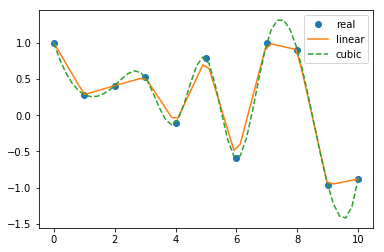

In [11]:
import matplotlib.pyplot as plt

plt.plot(x, y, 'o', x_new, f_linear(x_new), '-', x_new, f_cubic(x_new), '--')
plt.legend(['real', 'linear', 'cubic'], loc='best')
plt.show()

Una **función base radial** (RBF) es una función real $\phi(\cdot)$ cuyo valor depende solo da la distancia entre su input y algún punto fijo, en un espacio vectorial normado, esto toma la forma $\phi(\cdot) = \phi(|| \cdot - c||)$ para algún $c$ fijo. Sin perdida de generalidad, se puede considerar que una función RBF es una función que depende de la norma de su input, es decir, cumple $\phi(x) = \phi(||x||)$. Por le general, este tipo de funciones se denota por $\phi(r)$. Dentro de las funciones radiales se encuentran:

* Gaussiana: $\phi(r) = \exp({-(r/\varepsilon)^2})$
* Lineal: $\phi(r) = r$
* Cúbica: $\phi(r) = r^3$
* Multicuadrática = $\sqrt{(r/\varepsilon)^2 +1}$

SciPy ofrece un método de interpolación basado en funciones de base radial para datos N-dimensionales. 

**Ejemplo**

Se estudia un ejemplo en 2 dimensiones y se visualiza su resultado. Primero, se genera una malla de puntos.

In [12]:
# Puntos aleatorios entre -2 y 2 para los ejes x,y

x = np.random.rand(1000) * 4.0 - 2.0
y = np.random.rand(1000) * 4.0 - 2.0

# Función a interpolar


def func_2d(x, y): return x*np.exp(-x ** 2 - y ** 2)


# Datos con los cuales se interpola
z = func_2d(x, y)

# grilla 2-d regular entre -2 y 2
axis = np.linspace(-2.0, 2.0, 100)

'''
np.meshgrid(x,y) genera un iterable por medio del producto cartesiano 
entre x,y, se puede comprobar al ejecutar print((X[0,0],Y[0,0])).
'''

X, Y = np.meshgrid(axis, axis)

Se instancia el objeto RBF para que interpole los valores de `z` en los nodos dados por `(x,y)`. La función base a usar será la gaussiana.

In [13]:
'''
Se escohe el parámetro epsilon = 2, este controla 
la suavidad de la interpolacion
'''
eps =2
rbf = interpolate.Rbf(x, y, z, epsilon=eps)

C:\Users\reac9\Anaconda3\lib\site-packages\scipy\interpolate\rbf.py:220: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.860382e-21
  self.nodes = linalg.solve(self.A, self.di)


Finalmente se evalúa el interpolador obtenido en los puntos de la malla regular dada por `X` y `Y`.

In [14]:
Z = rbf(X,Y)

Se visualizan los resultados, en primer lugar se muestra el valor de la función en los puntos de la malla aleatoria

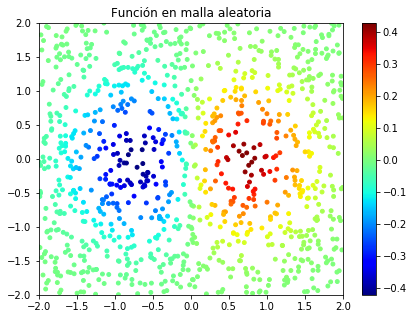

In [15]:
from matplotlib import cm

plt.figure(figsize=[15,5])
plt.subplot(1, 2, 1)
plt.scatter(x, y, s=15, c=z, cmap=cm.jet)
plt.title('Función en malla aleatoria')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.colorbar()

A continuación se muestra la interpolación en la malla regular

In [ ]:
plt.figure(figsize=[15,5])
plt.subplot(1, 2, 1)
plt.pcolor(X, Y, Z, cmap=cm.jet)
plt.title('Interpolación RBF gaussiana eps=2')
plt.xlim(-2, 2)
plt.ylim(-2, 2)

### Optimización

El módulo de optimización de SciPy proporciona bastantes algoritmos para resolver problemas con y sin restricciones para funciones escalares multivariadas, permite rutinas de optimización global, cálculo de mínimos cuadrados entre otras. 

Dentro de los métodos a considerar en este módulo, se encuentran:

* `linprog()` para minimizar una función objetivo lineal con restricciones de igualdad y desigualdad lineales.
* `minimize_scalar()` y `minimize()`, que permiten minimizar una función de una o más variables.
* `root_scalar()` y `root()` para calcular ceros de una función uni o multivariada
* `curve_fit()`, para ajustar una función a datos de entrada.

**Ejemplo**

Para comenzar, se resuelve un problema de optimización en una dimensión, en este caso se busca el mínimo de la función $f(x) = -\exp{-x^2}$, para ello se utiliza `optimize.minimize_scalar()`. En primer lugar, se importa el módulo de optimización.

In [ ]:
from scipy import optimize

Luego, se define la función

In [ ]:
def f(x):
    return x * np.exp(-(x)**2)

Se utiliza `optimize.minimize_scalar()` sobre la función definida, por defecto se utiliza el método de Brent. 

In [ ]:
res = optimize.minimize_scalar(f)

Se estudia el resultado

In [ ]:
# punto minimo
x_min = res.x
print('minimo: ',x_min)

# numero de iteraciones
print('numero de iteraciones: ', res.nit)

In [ ]:
x = np.linspace(-5,5,100)
plt.figure(figsize=[8,5])
plt.title('Minimizador escalar')
plt.plot(x, f(x), label = 'funcion objetivo')
plt.scatter(x_min,f(x_min),c='r',marker='o',label='Minimo encontrado')
plt.legend()
plt.show()

Es posible usar métodos basados en descenso de gradiente, se implementa el método de descenso de gradiente conjugado sobre una función de prueba.

In [ ]:
# Función a utilizar (Rosenbrock)
def f(x):
    return (1 / 2) * (1 - x[0])**2 + (x[1] - x[0]**2)**2

para minimizar una función de más de una variable, se utiliza el método `.optimize.minimize()` y se indica el método de gradiente conjugado por medio de `method='CG'`. Este método necesita el jacobiano (puede calcularse numéricamente pero es mejor definirlo)

In [ ]:
def jac(x):
    return np.array((-2 * .5 * (1 - x[0]) - 4 * x[0] * (x[1] - x[0]**2),
                     2 * (x[1] - x[0]**2)))

Se minimiza la función anterior en primer lugar sin proporcionar el jacobiano y comenzando desde el origen.

In [ ]:
res = optimize.minimize(fun = f, x0 = (0, 0), method="CG") 
print(res)

Se repite la el proceso entregando el jacobiano

In [ ]:
res_jac = optimize.minimize(fun = f, x0 = (0, 0), method="CG" , jac=jac)
print(res_jac)

Un método bastante usado es BFGS, este consiste en un método quasi-Newton que refina la aproximación de la matriz hessiana en cada paso. Se estudia este método con la función anterior.

In [ ]:
res_bfgs = optimize.minimize(f, [0, 0], method="BFGS", jac=jac)
print(res_bfgs)

**Ejercicio**

Utilice el módulo de optimización para ajustar una curva a un conjunto de datos sintéticos, para ello:

1. Defina una discretización `d`, uniforme del intervalo $[-2,2]$ con $n=100$ puntos.
2. Defina la función $f(x) = x \exp(-x^2)$, para generar los datos de ajuste `y = f(d)`.
3. Defina la familia de funciones a ajustar de la forma $f_{abc}(x) = a\cdot \cos(b\cdot x + c)$, donde $a,b,c$ son los parámetros a ajustar.
4. Ajuste la familia de funciones anterior a los datos `y`. Para ello.
    1. Cree la función `least_square` que calcula el error cuadrático de aproximar $f$ con $f_{abc}$ en `d`. Posteriormente, minimice tal error cuadrático usando `optimize.minimize()` con el método BFGS y punto inicial $x0 = (1,1,1)$ 
    2. Utilice la función `optimize.curve_fit()` sobre $f_{abc}$ con los datos `y` en la malla `d` .
    3. Compare los resultados obtenidos
5. Seleccione un método de los anteriores observe el ajuste de su modelo, para ello utilice la función `plot_fit()` definida en la celda inferior.

6. Añada ruido gaussiano a los datos `y = f(d)`, la desviación estándar del ruido debe ser del orden de $10^{-2}$. Vuelva a ajustar la familia $𝑓_{𝑎𝑏𝑐}$ y compare los resultados con el ajuste sin ruido.

In [ ]:
def plot_fit(func, params_list, data_grid=d, data_points=y):
    ''' Visualiza en pantalla una curva ajustada.
    
    Crea una visualizacion para el ajuste de func, contra
    los datos reales data_points. Para ello, se entrega una 
    lista de parámetros para la función func, de tal manera que 
    func(x,*params) tenga sentido para todo x en d. 
    
    Args:
        func: Funcion que se ajusta a los datos.
        
        params_list: Lista de parametros necesarios para la funcion func
            se debe poder ejecutar func(x,*params) para todo x float.
        
        data_grid: Malla sobre la cual se mide el ajuste.
        
        data_point: Datos para comparar el ajuste.
        
    Returns:
        None, genera una visualizacion de matplotlib
    '''
    f_opt = lambda x: func(x,*params_list)
    
    
    plt.figure(figsize=[8,5])
    plt.title('Ajuste a los datos',fontdict={'fontsize':18})
    plt.plot(data_grid,f_opt(data_grid), label = 'Ajuste')
    plt.plot(data_grid,y, label = 'datos')
    plt.legend(fontsize = 12)